# Zestaw zadań: Interpolacja
## Zadanie 1
### Autor: Artur Gęsiarz

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Populacja Stanów Zjednoczonych na przestrzeni lat

In [59]:
population_US = {
    1900: 76212168,
    1910: 92228496,
    1920: 106021537,
    1930: 123202624,
    1940: 132164569,
    1950: 151325798,
    1960: 179323175,
    1970: 203302031,
    1980: 226542199
}

years = np.array(list(population_US.keys()))
population = np.array(list(population_US.values()))

### Wyznacznie wszystkich podanych bazowych czterech funkcji dla j = 1,...,9

In [60]:
first_base_function = [lambda t, j=i: pow(t,j - 1) for i in range(1,10)]
second_base_function = [lambda t, j=i: pow(t - 1900, j - 1) for i in range(1,10)]
third_base_function = [lambda t, j=i: pow(t - 1940, j - 1) for i in range(1,10)]
fourth_base_function = [lambda t, j=i: pow((t - 1940)/40, j - 1) for i in range(1,10)]

### Implementacja funkcji Vandermonde

In [61]:
def vandermonde_matrix(population: dict, base_functions):
    n = len(population.keys())
    m = len(base_functions)
    V = np.zeros((n, m))
    row = -1
    for year in population.keys():
        row += 1
        for j in range(m):
            V[row][j] = base_functions[j](year)
    return V

### Wyznaczanie dla kazdego ze zbiorow funkcji bazowych macierz Vandermone

In [62]:
V_first = vandermonde_matrix(population_US, first_base_function)
V_second = vandermonde_matrix(population_US, second_base_function)
V_third = vandermonde_matrix(population_US, third_base_function)
V_fourth = vandermonde_matrix(population_US, fourth_base_function)

### Współczynnik uwarunkowania każdej z powyższch macierzy

In [63]:
cond_first = np.linalg.cond(V_first)
cond_second = np.linalg.cond(V_second)
cond_third = np.linalg.cond(V_third)
cond_fourth = np.linalg.cond(V_fourth)

### Używając najlepiej uwarunkowanej bazy wielomianów, znajduje współczynniki wielomianu interpolacyjnego

In [64]:
V_best = V_second
coefficients = np.linalg.solve(V_best, population)  # wspolczynniki

def polynomial_interpolation(coefficients, base_functions, x):
    result = 0
    for i in range(len(coefficients)):
        result += coefficients[i] * base_functions[i](x)
    return result

### Narysowanie wielomianu interpolacyjnego

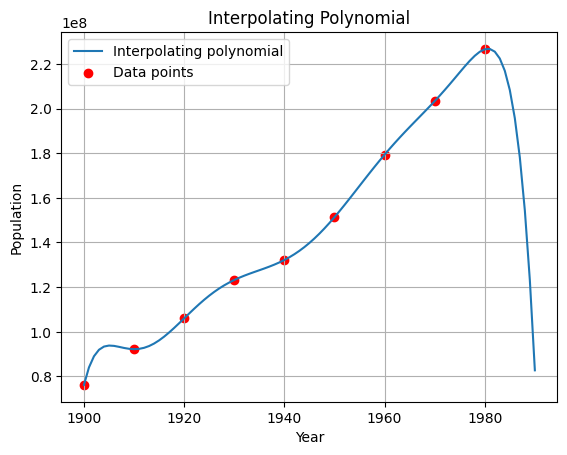

In [65]:
x_values = np.arange(1900, 1991)
y_values = polynomial_interpolation(coefficients, second_base_function, x_values)

plt.plot(x_values, y_values, label='Interpolating polynomial')
plt.scatter(years, population, color='red', label='Data points')
plt.title('Interpolating Polynomial')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()